In [1]:
import pandas as pd
import numpy as np
from datetime import date

In [2]:
# 초기 tidy
def tidy(df):
    df.columns = ['방송', '식당', '방영일', '포스팅일', '제목', '주소']
    df = df[df['포스팅일'].isnull() == False]
    df['방영일'] = df['방영일'].astype(str)
    
    return df

In [3]:
# 방영일 date 형식으로 바꾸기
def get_date_from_b_date(df_column):
    b_date = []
    for data in df_column:
        year = data[:4]
        month = data[4:6]
        day = data[6:8]
        single_date = date(int(year), int(month), int(day))
        b_date.append(single_date)

    return pd.Series(b_date)

In [4]:
# 포스팅일 date 형식으로 바꾸기
def get_date_from_p_date(df_column):
    p_date = []
    for data in df_column:
        date_components = data.split('.')
        year = date_components[0]
        month = date_components[1]
        day = date_components[2]
        single_date = date(int(year), int(month), int(day))
        p_date.append(single_date)
    return pd.Series(p_date)

In [5]:
# 방영일과 포스팅일 날짜 차이 구하기
def get_days_diff(col_days_diff, col_b_day, col_p_day):
    col_days_diff = col_p_day - col_b_day
    col_days_diff = col_days_diff.astype(str).str.findall(r'(\-?\d+)\s')
    days_list = []
    for days in col_days_diff:
        days_list.append(int(days[0]))
    return days_list

In [6]:
# 위치정보 넣기
dining_areas = {
'대풍만두' :'안동' ,'큰바다해물아구찜' :'일산/파주' ,'여인천하조개구이' :'인천/을왕리/영종도' ,'제일정육정식당' :'용문/오산' ,'칡산에' :'원주' ,'동남집' :'구디/가산' ,
'찜혜화동' :'대학로/혜화' ,'통큰손칼국수' :'인천/소랲포구' ,'송씨 뼈대 있는 짬뽕' :'강원도/원주/횡성' ,'행복한 콩박사' :'오산/양산/병점' ,'아이포차' :'부천/역곡' ,'김관석의 탐라돈' :'신촌/홍대' ,
'청송숯불갈비' :'대구/대명' ,'세친구 족발이야기' :'인천/계양/작전' ,'요망진 도세기' :'제주/애월/당산' ,'돈까스잔치' :'동빙고/용산/동부' ,'송영선할머니갈비집' :'포천' ,'136생고기' :'인천/작전동/동부' ,
'영월애곤드레' :'인천/부천' ,'빽갈비1983' :'논현/강남구청' ,'마포참치' :'마포' ,'옛골매운갈비김치찜' :'성남/상대원/모란' ,'토가' :'강화도' ,'짜글이식당' :'충주/청주' ,
'번개맞은흑돼지' :'제주/서귀포' ,'섭지향' :'제주/성산/섭지코지' ,'꼬치파이터' :'전주/객사' ,'용두동쭈꾸미' :'동대문' ,'소담골' :'동두천/강화도' ,'광명소고기순대국' :'광명/철산' ,
'신촌해물칼국수' :'신촌/홍대' ,'더행복' :'상암' ,'편가네 간장게장' :'강화도' ,'행복한 곰탕' :'대전/유성/세종' ,'밴댕이소갈딱지삼겹살강가네' :'진해/창원' ,'천마루' :'무주' ,
'군자네' :'대흥/마포' ,'현래장' :'마포' ,'시내식당' :'광양/여수' ,'금목서회관' :'광양' ,'평창면옥' :'평창' ,'더코너키친' :'옥수/평창' ,
'구로식당 본점' :'구디/구로' ,'영빈관' :'원주' ,'맛자랑' :'경주' ,'할머니 묵집' :'파주' ,'구옹진식당' :'서산/충남' ,'강화해신탕' :'강화' ,
'속초어시장' :'일산' ,'약산궁 능이버섯백숙' :'포천/경기' ,'속초해물보쌈전골' :'속초' ,'제주미돈' :'인천/소래' ,'오시오집' :'영등포/여의도' ,'계림식당' :'종로' ,
'옛골할머니감자탕순대국' :'일산' ,'청담추어정' :'성남/시흥' ,'까치기사식당' :'인천/십정동' ,'시골본가집' :'남양주' ,'갈비구락부' :'울산/언양' ,'반저' :'대학로/혜화' ,
'소문난 곱창' :'마천/송파' ,'당구대통철판삼겹살' :'부산/기장' ,'전주집' :'종로/을지로' ,'원조추어탕' :'강남/역삼/신논현' ,'샤리' :'부산/서면' ,'이태리국시' :'대전/둔산' ,
'쑥고개부대찌개' :'안성/칠곡' ,'꽃삼' :'아산/신용화' ,'네모오징어 도곡본점' :'매봉/도곡' ,'연호정칼국수' :'김포/강화' ,'진심인게야' :'일산/풍동' ,'스앤샤 홍대본점' :'홍대' ,
'취향왕짬뽕' :'안양/시흥' ,'쇠뫼기' :'경기/광주/퇴촌' ,'바다담은 해물 손칼국수' :'원당/일산/고양' ,'강릉아구찜' :'신촌/이대' ,'미스테이크룸' :'이태원' ,'고기한점 달빛한점' :'하단/건대/광진구' ,
'하선재 간장게장' :'송파/방이/잠실' ,'이태원 우육미엔' :'이태원/한남' ,'푸른초장' :'충정' ,'어부네 횟집' :'마포' ,'철판패밀리' :'의정부' ,'해신247' :'아주/거제' ,
    
# 맛있는 녀석들
    '내호냉면' : '부산', '한방장어구이' : '부산', 
'김영자 나주곰탕' : '신림', '강촌원조쭈꾸미' : '양재', 
'바다회사랑' : '홍대/연남/마포', '디 안다만' : '양재', 
'화수목' : '분당/서현', '매화반점' : '건대/자양', 
'개미집' : '건대/화양', '사당삼겹살' : '남현', 
'등촌최월선칼국수' : '등촌', '야바이' : '신촌/창천', 
'현대북어찜' : '역삼', '순라길' : '권농/종로', 
'무등산' : '청담', '도셰프' : '반포/논현', 
'정통부대고기' : '의정부', '먹깨비' : '동대문/장안', 
'청운누룽지백숙' : '의왕', '포브라더스' : '도곡/강남', 
'수협회센터' : '완도', '두메향기 산' : '양평', 
'진흥관' : '김포', '건대통골뱅이' : '강남/논현', 
'그릭슈바인' : '강남/논현', '일억조식당' : '완도', 
'매봉골 황제능이버섯' : '남양주', '바람아래돌꽃게장' : '고양', 
'순천만가든' : '순천', '남문식당' : '강진', 
'보리네 생고깃간' : '안성', '소문난 잔치국수' : '공릉', 
'경포' : '성남', '미소복 양평해장국' : '갈현', 
'뿌자2' : '을지로', '코리아노스키친' : '용산/이태원', 
'조선김밥' : '종로/소격/삼청', '봉청동진순자김밥' : '봉천', 
'장하촌' : '가양', '강남목장' : '강남/역삼', 
'홍어랑 민어랑' : '불광', '박달재 자연식당' : '양재', 
'만복기사식당' : '마포/망원', '명가막국수' : '춘천', 
'개화옥 등심' : '신사', '텍사스 데 브라질' : '반포/고속터미널', 
'한옥집' : '냉천/서대문', '우정낙지' : '종로/서린/무교', 
'팔팔민물장어' : '강남/반포', '황금복국' : '강남/서초', 
'샘밭막국수' : '춘천', '원조숯불닭불고기' : '춘천', 
'산밑할머니묵집' : '대전', '진로집' : '대전', 
'사돈집' : '속초', '동명항게찜' : '속초', 
'대동할매국수' : '김해', '김정식의 삼일뒷고기' : '김해', 
'속씨원한 대구탕' : '부산', '한량' : '부산', 
'시오' : '서대문/연희', '샤이바나' : '코엑스/동대문/분당/서현/고양/판교/상수/세종/도담/스타필드/광화문/강남/삼성/아쿠아리움/합정/송도/홍대/가산/시청/청계천/일산/삼청동/스타시티/DDP/부산/서면/중구/을지로/삼송', 
'원조다래솥뚜껑' : '동두천', '오륙하우스' : '동두천', 
'백담황태구이' : '인제/백담사', '자작나무집' : '인제/원대리', 
'전주중앙회관' : '명동/충무로', '메이탄' : '시청/서초/강남/신당/왕십리/신논현/중구/상계/서대문/천안/노원/상계/마포/공덕/선유도/공덕/우장산/당산/강서/발산/청정로/', 
'미타우동' : '신천/잠실/삼전', '도마' : '광화문/종로/익선/안국/인사', 
'텐마루' : '가산/금천', '라화쿵부' : '신촌/건대/구월/남대문/명동/이대/외대/이문/대림/동대문/강남/영등포/울산', 
'소백산' : '양재', '건대황소곱창' : '건대/화양', 
'박승광손칼국수' : '김포', '큰손참붕어찜' : '김포', 
'나폴레옹 과자점' : '성북', '류재은베이커리' : '파주', 
'시청/서초/강남/신당/왕십리/신논현/중구/상계/서대문/천안/노원/상계/마포/공덕/선유도/공덕/우장산/당산/강서/발산/충정로/아현' : '광주', 

  '오통영':'청담/압구정/이촌', '안동장':'을지로', 
'평양집':'용산/삼각지/이태원', '까사디노아':'연남동', 
'덕자네 방앗간':'신논현/강남/압구정/서초', '루비떡볶이':'압구정/신사/청담', 
'참식당':'마포', '갯바위':'서울대입구/봉천', 
'포담':'서초/통인', '따빠스구르메':'서초/통인', 
'고래불':'역삼', '영주묵호문어집':'영주', 
'오돌':'영등포/여의도/당산', '미갈매기살':'종로', 
'안즈':'명동/을지로', '정돈':'대학로/혜화', 
'다미':'여의도', '대원식당':'용산/삼각지', 
'개화옥':'압구정/신사/가로수길/청담', '대복집':'광화문/시청/경복궁', 
'멍게가':'통영', '수정식당':'통영', 
'주은감자탕':'잠실/송파/삼전', '닭한마리감자탕':'신사', 
'금홍':'이촌/신사', '아지겐':'용산/이촌', 
'서일농원 솔리':'안성', '목향원':'남양주', 
'서울여관식당':'청송', '오복손두부':'광주/남한산성', 
'다운타우너':'이태원/한남동/청담/압구정', '카퍼룸':'선정릉/삼성/강남', 
'우정회관':'고창', '연기식당':'고창', 
'아티장베이커스':'서래마을/한남동', '악소':'한남동', 
'부첼리하우스':'용산/한남동', '로리스더프라임립':'강남', 
'엽기꼼닭발':'왕십리', '재구네 닭발':'신당', 
'비야게레로':'강남/삼성', '바토스':'이태원/신사/가로수길/잠실', 
'정인면옥':'여의도', '함흥에겨울냉면':'동대입구/장충동', 
'브로이하우스 바네하임':'노원/공릉', '갓포치유':'압구정/도산공원/신사', 
'화선횟집':'인천/신포', '병우네':'삼청/팔판동', 
'남도사계 고운님':'삼성/대치/강남', '동해오징어보쌈':'안양', 
'옛골':'강남/역삼/청계산', '성일 정육점':'성수/뚝섬', 
'산성대가':'남한산성', '진남포면옥':'약수', 
'팜티진':'왕십리', '사이공리':'노량진', 
'미쓰양꼬치':'대치/선릉', '명봉샤브샤브양꼬치':'건대/자양', 
'탑동물항식당':'제주/탑동', '네거리식당':'제주/서귀포', '안주마을':'서촌/경복궁', 
'짱이네 산곰장어':'논현/언주', '메종엠오':'방배/서래마을/내방', 
'쉐즈롤':'양평/서종/문호리', '논밭골':'봉천/서울대입구', 
'배꼽집':'논현/여의도/백석/일산/상암/강남/마곡/발산', '월성식당':'강릉/주문진/신월성', 
'강릉감자옹심이':'강릉', '제주도 아줌마네집':'둔촌/강동/성내', 
'신복촌':'여의도', '대림동 삼거리먼지막순댓국':'대림', 
'농민백암순대':'선릉/대치/강남', '대감왕족발':'압구정/강남/신사', 
'와글와글족':'공항동/김포/송정', '라이차이':'공항동/당산/강서', 
'대관원':'당산/영등포', '백부장집 닭 한 마리':'신도림/마포/구로/망원', 
'강촌 숯불 닭갈비':'신도림/마포/구로/망원', '구복만두':'남영/숙대/용산', 
'취천루':'서촌/경복궁/명동', '삐아프':'가로수길/신사', 
'끌라시끄':'분당/정자', '테라13':'청담/압구정/학동사거리', 
'레스쁘아 뒤 이브':'청담/압구정/학동사거리'
}

In [7]:
sangsang = pd.read_csv('raw_data/sangsang_2017_90days.csv')
suyo = pd.read_csv('raw_data/suyo_2017_90days.csv')
mashit = pd.read_csv('raw_data/mashit_2017_90days.csv')

In [8]:
sangsang.columns = ['방송', '식당', '방영일', '포스팅일', '제목', '주소']
sangsang['방송'] = '생생'

In [9]:
def final_tidy(df):
    df = tidy(df)
    df['방영일'] = get_date_from_b_date(df['방영일'])
    df['포스팅일'] = get_date_from_p_date(df['포스팅일'])
    df['days_diff'] = pd.Series()
    df['days_diff'] = get_days_diff(df['days_diff'], df['방영일'], df['포스팅일'])
    df['지역'] = df['식당'].map(dining_areas).astype(str)
    tidy_df = df.loc[df.apply(lambda r: ((any(area in r[4] for area in r[7].split('/'))) | (r[0] in r[4])), axis=1)]
    return tidy_df

# # 칼럼명, 널값 없애기
# sangsang = tidy(sangsang)

# # 방영일, 포스팅일 date 객체로 바꾸기
# sangsang['방영일'] = get_date_from_b_date(sangsang['방영일'])
# sangsang['포스팅일'] = get_date_from_p_date(sangsang['포스팅일'])

# # days_diff 구하기
# sangsang['days_diff'] = pd.Series()
# sangsang['days_diff'] = get_days_diff(sangsang['days_diff'], sangsang['방영일'], sangsang['포스팅일'])

# # 지역 맵핑하기
# sangsang['지역'] = sangsang['식당'].map(dining_areas).astype(str)

# # 식당이름, 방송이름, 지역이 포함된 row만 살리기
# sangsang_area = sangsang.loc[sangsang.apply(lambda r: ((any(area in r[4] for area in r[7].split('/'))) | (r[0] in r[4])|(r[1] in r[4])), axis=1)]

In [10]:
sangsang_area = final_tidy(sangsang)
suyo_area = final_tidy(suyo)
mashit_area = final_tidy(mashit)

In [11]:
print('생생정보통', sangsang.shape, sangsang_area.shape)
print('수요미식회', suyo.shape, suyo_area.shape)
print('맛있는 녀석들', mashit.shape, mashit_area.shape)

생생정보통 (28463, 6) (5229, 8)
수요미식회 (35712, 6) (12010, 8)
맛있는 녀석들 (33662, 6) (8360, 8)


In [2]:
df = pd.read_csv('raw_data/2017_tidy2.csv')

In [3]:
df.head()

,방송,식당,방영일,포스팅일,제목,주소,days_diff,지역
0,생생,대풍만두,2017-01-03,2017-01-08,안동 사대부찜닭 생생정보통에 나온 <mark>대풍만두</mark> 다녀왔어요,"https://m.blog.naver.com/hts1222/220905835536""",5,안동
1,생생,대풍만두,2017-01-03,2017-01-27,"안동구시장찐빵맛집, 생생정보통 <mark>대풍만두</mark>","https://m.blog.naver.com/pinkwona/220920892215""",24,안동
2,생생,대풍만두,2017-01-03,2016-12-20,"안동시 서부동 만두맛집, <mark>대풍만두</mark>","http://siksamenu.tistory.com/2212""",-14,안동
3,생생,대풍만두,2017-01-03,2017-01-03,오즈패밀리 KBS 생생정보 1월3일 맛집 - 흑미 복분자 찐빵(<mark>대풍만두<...,"https://m.blog.naver.com/flypig1/220901684323""",0,안동
4,생생,대풍만두,2017-01-03,2017-01-03,"◈ 안동 찐빵 만두 맛집 공유~* , 2tv 저녁 생생정보 안동 구시장 찐빵 맛집 ...","https://m.blog.naver.com/mediost/220901827867""",0,안동


In [4]:
sang = df.loc[df['방송']=='생생']
suyo = df.loc[df['방송']=='수요미식회']
mat = df.loc[df['방송']=='맛있는녀석들']

In [5]:
from plotnine import *

sang['cnt'] = suyo['cnt'] = mat['cnt'] = 1

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [6]:
sang.head()

,방송,식당,방영일,포스팅일,제목,주소,days_diff,지역,cnt
0,생생,대풍만두,2017-01-03,2017-01-08,안동 사대부찜닭 생생정보통에 나온 <mark>대풍만두</mark> 다녀왔어요,"https://m.blog.naver.com/hts1222/220905835536""",5,안동,1
1,생생,대풍만두,2017-01-03,2017-01-27,"안동구시장찐빵맛집, 생생정보통 <mark>대풍만두</mark>","https://m.blog.naver.com/pinkwona/220920892215""",24,안동,1
2,생생,대풍만두,2017-01-03,2016-12-20,"안동시 서부동 만두맛집, <mark>대풍만두</mark>","http://siksamenu.tistory.com/2212""",-14,안동,1
3,생생,대풍만두,2017-01-03,2017-01-03,오즈패밀리 KBS 생생정보 1월3일 맛집 - 흑미 복분자 찐빵(<mark>대풍만두<...,"https://m.blog.naver.com/flypig1/220901684323""",0,안동,1
4,생생,대풍만두,2017-01-03,2017-01-03,"◈ 안동 찐빵 만두 맛집 공유~* , 2tv 저녁 생생정보 안동 구시장 찐빵 맛집 ...","https://m.blog.naver.com/mediost/220901827867""",0,안동,1


In [7]:
sang_group = sang.groupby(['식당', 'days_diff']).sum().reset_index()
sang_group = sang.groupby('days_diff').agg(np.mean).reset_index()

In [8]:
sang['방송전'] = sang['days_diff'] < 0
sang['방송후'] = sang['days_diff'] > 0
sang['방송당일'] = sang['days_diff'] == 0

sang['방송전'] = sang['방송전'].astype(int)
sang['방송후'] = sang['방송후'].astype(int)
sang['방송당일'] = sang['방송당일'].astype(int)

sang.groupby('식당').sum().describe()

# 생생정보통은 가장 적은 포스팅 수의 증가를 보인다
# 방송전/ 방송 후를 30일로 나누면 방송 전/후의 일평균 포스팅 수를 볼 수 있다. 

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexi

,days_diff,cnt,방송전,방송후,방송당일
count,83.000000,83.000000,83.000000,83.000000,83.000000
mean,66.734940,63.000000,21.228916,26.216867,15.554217
std,482.245664,56.726988,27.444101,28.161576,7.396857
min,-1333.000000,1.000000,0.000000,0.000000,0.000000
25%,-77.000000,30.000000,5.000000,10.500000,12.000000
50%,60.000000,49.000000,11.000000,19.000000,17.000000
75%,315.000000,75.500000,30.000000,29.000000,21.000000
max,1785.000000,352.000000,165.000000,167.000000,27.000000


C:\Users\user1\AppData\Roaming\Python\Python36\site-packages\pandas\core\generic.py:4388: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\user1\AppData\Roaming\Python\Python36\site-packages\pandas\core\generic.py:4389: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)
C:\Users\user1\AppData\Roaming\Python\Python36\site-packages\plotnine\positions\position.py:188: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  intervals = data[xminmax].drop_duplicates().as_matrix().flatten()


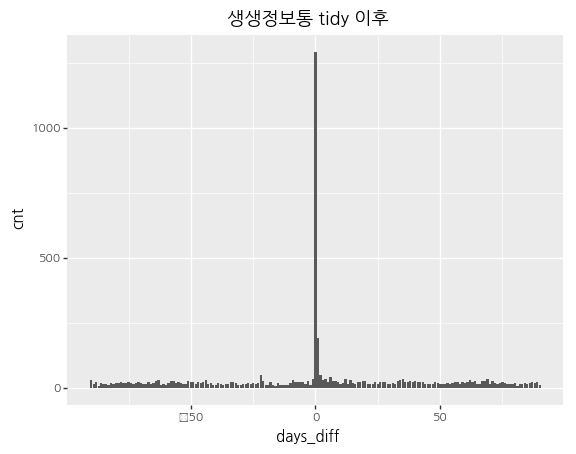

<ggplot: (-9223371861623176732)>

In [9]:
# to_do : 예빈
# 평균값으로 그려주기
# y의 max값 맞춰주기
sangsang_group = sang.groupby(['식당','days_diff']).sum().sort_values(by='days_diff').reset_index()
sangsang_group = sang.groupby('days_diff').sum().reset_index()

(ggplot(sangsang_group)
+ aes(x='days_diff', y='cnt')
 + ggtitle('생생정보통 tidy 이후')
 + geom_bar(stat='identity', position='dodge')
 + theme(text=element_text(family='NanumGothic'))
)

## 수요미식회

In [11]:
suyo['방송전'] = suyo['days_diff'] < 0
suyo['방송후'] = suyo['days_diff'] > 0
suyo['방송당일'] = suyo['days_diff'] == 0

suyo['방송전'] = suyo['방송전'].astype(int)
suyo['방송후'] = suyo['방송후'].astype(int)
suyo['방송당일'] = suyo['방송당일'].astype(int)

suyo.groupby('식당').sum().describe()

# 수요미식회는 아주 폭발적인 포스팅 수 증가를 보인다. 거의 3배 이상의 증가이며
# 방송 당일의 평균 포스팅 수도 가장 많다. 

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexi

,days_diff,cnt,방송전,방송후,방송당일
count,84.000000,84.000000,84.000000,84.000000,84.000000
mean,1598.059524,142.976190,33.428571,91.297619,18.250000
std,1505.374775,133.840849,55.376539,79.034350,8.877853
min,-641.000000,2.000000,0.000000,2.000000,0.000000
25%,547.250000,67.000000,6.750000,49.750000,12.750000
50%,1259.000000,103.500000,15.500000,70.000000,17.500000
75%,2232.000000,160.000000,31.250000,109.250000,24.250000
max,10440.000000,887.000000,311.000000,558.000000,43.000000


In [12]:
suyo_group = suyo.groupby(['식당','days_diff']).sum().sort_values(by='days_diff').reset_index()
suyo_group = suyo_group.groupby('days_diff').sum().reset_index()
suyo_group.head(3)

,days_diff,cnt,방송전,방송후,방송당일
0,-90,25,25,0,0
1,-89,23,23,0,0
2,-88,18,18,0,0


C:\Users\user1\AppData\Roaming\Python\Python36\site-packages\pandas\core\generic.py:4388: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\user1\AppData\Roaming\Python\Python36\site-packages\pandas\core\generic.py:4389: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)
C:\Users\user1\AppData\Roaming\Python\Python36\site-packages\plotnine\positions\position.py:188: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  intervals = data[xminmax].drop_duplicates().as_matrix().flatten()


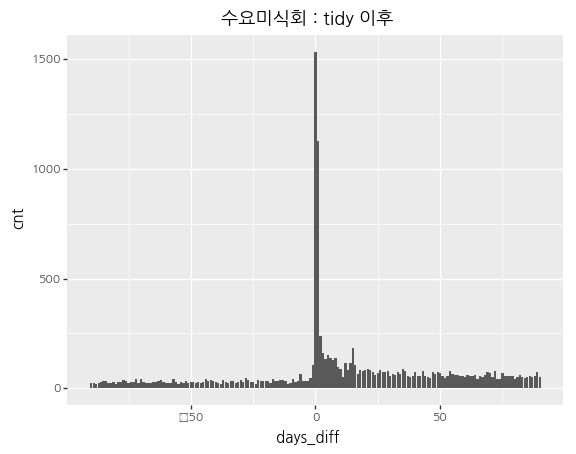

<ggplot: (-9223371861622715539)>

In [13]:
(ggplot(suyo_group)
+ aes(x='days_diff', y='cnt')
 + ggtitle('수요미식회 : tidy 이후')
 + geom_bar(stat='identity', position='dodge')
 + theme(text=element_text(family='NanumGothic'))
)

## 맛있는 녀석들

In [14]:
mat['방송전'] = mat['days_diff'] < 0
mat['방송후'] = mat['days_diff'] > 0
mat['방송당일'] = mat['days_diff'] == 0

mat['방송전'] = mat['방송전'].astype(int)
mat['방송후'] = mat['방송후'].astype(int)
mat['방송당일'] = mat['방송당일'].astype(int)

mat.groupby('식당').sum().describe()

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexi

,days_diff,cnt,방송전,방송후,방송당일
count,79.000000,79.000000,79.000000,79.000000,79.000000
mean,359.620253,105.822785,43.772152,59.227848,2.822785
std,1859.107425,171.268777,81.197283,90.820187,2.535691
min,-3010.000000,1.000000,0.000000,1.000000,0.000000
25%,-5.000000,20.500000,3.000000,15.000000,1.000000
50%,228.000000,49.000000,13.000000,31.000000,2.000000
75%,558.500000,109.000000,40.000000,59.000000,4.000000
max,14298.000000,1000.000000,504.000000,498.000000,12.000000


In [24]:
mat.head()

,방송,식당,방영일,포스팅일,제목,주소,days_diff,지역,cnt,방송전,방송후,방송당일
17239,맛있는녀석들,내호냉면,2017-01-06,2016-12-14,24시간의 부산체험,"https://m.blog.naver.com/kilo0715/220885598908""",-23,부산,1,1,0,0
17240,맛있는녀석들,내호냉면,2017-01-06,2017-03-30,부산 밀면 맛집 '<mark>내호냉면</mark>',"https://m.blog.naver.com/imrich777/220971326602""",83,부산,1,0,1,0
17241,맛있는녀석들,내호냉면,2017-01-06,2017-01-15,리얼맛집 부산 우암동 <mark>내호냉면</mark>!,"https://m.blog.naver.com/jge8989/220911681367""",9,부산,1,0,1,0
17242,맛있는녀석들,내호냉면,2017-01-06,2017-01-06,"원조 밀면집, 이춘복, 우암동 맛집, <mark>내호 냉면</mark>, 가격 위치...","http://pulgi.tistory.com/885""",0,부산,1,0,0,1
17243,맛있는녀석들,내호냉면,2017-01-06,2017-02-20,"부산여행, 한국전 당시 임시수도기간 이승만대통령 관저/부산 임시수도기념관","https://m.blog.naver.com/jjaeeui/220940051930""",45,부산,1,0,1,0


C:\Users\user1\AppData\Roaming\Python\Python36\site-packages\pandas\core\generic.py:4388: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\user1\AppData\Roaming\Python\Python36\site-packages\pandas\core\generic.py:4389: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)
C:\Users\user1\AppData\Roaming\Python\Python36\site-packages\plotnine\positions\position.py:188: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  intervals = data[xminmax].drop_duplicates().as_matrix().flatten()


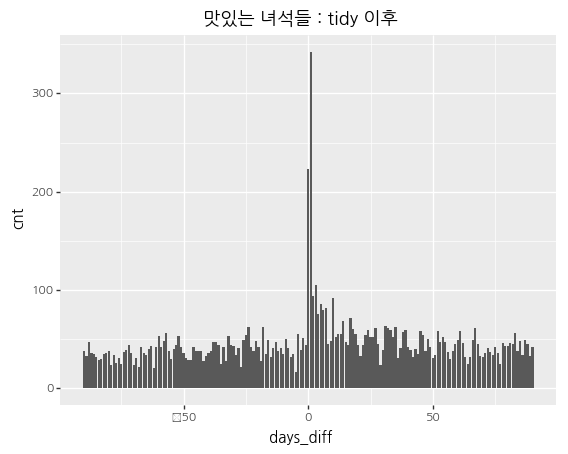

<ggplot: (175232079999)>

In [15]:
mashit_group = mat.groupby(['식당','days_diff']).sum().sort_values(by='days_diff').reset_index()
mashit_group = mashit_group.groupby('days_diff').sum().reset_index()
mashit_group.head(3)

(ggplot(mashit_group)
+ aes(x='days_diff', y='cnt')
 + ggtitle('맛있는 녀석들 : tidy 이후')
 + geom_bar(stat='identity', position='dodge')
 + theme(text=element_text(family='NanumGothic'))
)

In [19]:
sangsang_group["방송"] = "생생정보"
mashit_group["방송"] = "맛있는녀석들"
suyo_group["방송"] = "수요미식회"
all_group = pd.concat([sangsang_group, mashit_group, suyo_group])


,days_diff,cnt,방송전,방송후,방송당일,방송
0,-90,31,31,0,0,생생정보
1,-89,18,18,0,0,생생정보
2,-88,24,24,0,0,생생정보
3,-87,9,9,0,0,생생정보
4,-86,19,19,0,0,생생정보
5,-85,18,18,0,0,생생정보
6,-84,17,17,0,0,생생정보
7,-83,11,11,0,0,생생정보
8,-82,19,19,0,0,생생정보
9,-81,15,15,0,0,생생정보


C:\Users\user1\AppData\Roaming\Python\Python36\site-packages\plotnine\utils.py:281: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  ndistinct = ids.apply(len_unique, axis=0).as_matrix()
C:\Users\user1\AppData\Roaming\Python\Python36\site-packages\pandas\core\generic.py:4388: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\user1\AppData\Roaming\Python\Python36\site-packages\pandas\core\generic.py:4389: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)
C:\Users\user1\AppData\Roaming\Python\Python36\site-packages\plotnine\positions\position.py:188: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  intervals = data[xminmax].drop_duplicates().as_matrix().flatten()


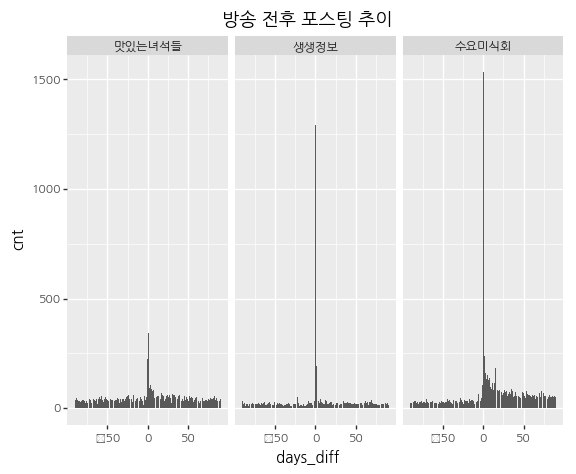

<ggplot: (-9223371861622439813)>

In [27]:
from plotnine.facets import *

(ggplot(all_group)
+ aes(x='days_diff', y='cnt')
 + ggtitle('방송 전후 포스팅 추이')
 + geom_bar(stat='identity', position='dodge')
 + theme(text=element_text(family='NanumGothic'))
 + facet_wrap('방송', nrow=1, ncol=3)
)

In [41]:
# (ggplot(all_group)
# + aes('days_diff')
#  + ggtitle('방송 전후 포스팅 추이')
#  + geom_histogram(bins=18)
#  + theme(text=element_text(family='NanumGothic'))
#  + facet_wrap('방송', nrow=1, ncol=3)
# )
all_group["day_group"] = (all_group.days_diff // 10) * 10
all_group.head()

,days_diff,cnt,방송전,방송후,방송당일,방송,day_group
0,-90,31,31,0,0,생생정보,-90
1,-89,18,18,0,0,생생정보,-90
2,-88,24,24,0,0,생생정보,-90
3,-87,9,9,0,0,생생정보,-90
4,-86,19,19,0,0,생생정보,-90


In [ ]:
all_group.groupby